In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd

mpg = pd.read_csv("https://github.com/tidyverse/ggplot2/raw/main/data-raw/mpg.csv")

# mpg.dtypes
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [3]:
mpg.select_dtypes('number').columns

mpg['cty2interval'] = pd.cut(mpg['cty'], bins=2) # equal interval discretization
mpg['cty2interval'].value_counts()

mpg['cty2freq'] = pd.qcut(mpg['cty'], q=2, labels=['low', 'high']) # equal frequency discretization
mpg['cty2freq'].value_counts()

Index(['displ', 'year', 'cyl', 'cty', 'hwy'], dtype='object')

(8.974, 22.0]    216
(22.0, 35.0]      18
Name: cty2interval, dtype: int64

low     132
high    102
Name: cty2freq, dtype: int64

In [4]:
obj_col = mpg.select_dtypes('object').columns
for col in obj_col:
    print(f"{col} has {mpg[col].nunique()} unique values")
    
pd.concat([pd.get_dummies(mpg['drv']), mpg['drv']], axis=1)

manufacturer has 15 unique values
model has 38 unique values
trans has 10 unique values
drv has 3 unique values
fl has 5 unique values
class has 7 unique values


,4,f,r,drv
0,0,1,0,f
1,0,1,0,f
2,0,1,0,f
3,0,1,0,f
4,0,1,0,f
...,...,...,...,...
229,0,1,0,f
230,0,1,0,f
231,0,1,0,f
232,0,1,0,f


In [5]:
import numpy as np
from scipy.stats.mstats import winsorize

np.min(mpg['cty'])
np.min(winsorize(mpg['cty'], limits=[0.1, 0.1]))
np.max(mpg['cty'])
np.max(winsorize(mpg['cty'], limits=[0.1, 0.1]))

print(f"There are {mpg.isna().sum().sum()} missing values.")
print(f"There are {mpg.duplicated().sum()} duplicated records.")

9

11

35

21

There are 0 missing values.
There are 9 duplicated records.


In [6]:
mpg.groupby('drv')['cty'].mean()
mpg.groupby('drv')['cty'].agg(['count', 'mean', 'std']).reset_index()

drv
4    14.330097
f    19.971698
r    14.080000
Name: cty, dtype: float64

,drv,count,mean,std
0,4,103,14.330097,2.874459
1,f,106,19.971698,3.626510
2,r,25,14.080000,2.215852


In [7]:
import scipy

mpg['cty_zscore'] = (mpg['cty'] - mpg['cty'].mean())/mpg['cty'].std()
mpg['cty_zscore'].describe()

count    2.340000e+02
mean     3.036507e-16
std      1.000000e+00
min     -1.846587e+00
25%     -6.717601e-01
50%      3.313615e-02
75%      5.030670e-01
max      4.262513e+00
Name: cty_zscore, dtype: float64

In [8]:
# permutation of the data frame
mpg.sample(frac=1).head(5)
mpg.shape
mpg.sample(frac=0.6).shape

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cty2interval,cty2freq,cty_zscore
182,toyota,camry,2.4,2008,4,auto(l5),f,21,31,r,midsize,"(8.974, 22.0]",high,0.972998
115,hyundai,tiburon,2.0,1999,4,auto(l4),f,19,26,r,subcompact,"(8.974, 22.0]",high,0.503067
48,dodge,dakota pickup 4wd,3.7,2008,6,manual(m6),4,15,19,r,pickup,"(8.974, 22.0]",low,-0.436795
124,jeep,grand cherokee 4wd,4.0,1999,6,auto(l4),4,15,20,r,suv,"(8.974, 22.0]",low,-0.436795
33,chevrolet,malibu,2.4,2008,4,auto(l4),f,22,30,r,midsize,"(8.974, 22.0]",high,1.207963


(234, 14)

(140, 14)

In [9]:
# Load in python visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

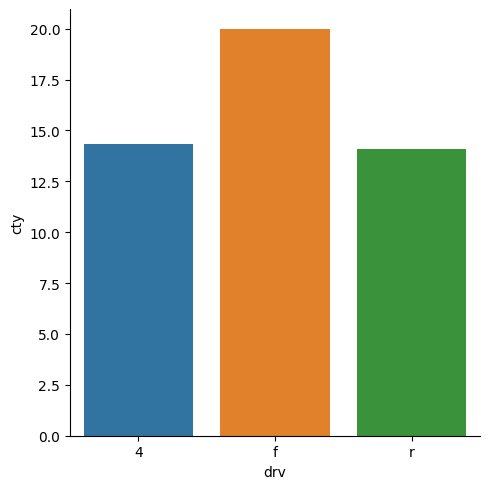

In [10]:
cty_by_drv = mpg.groupby('drv')['cty'].mean().reset_index()
sns.catplot(x='drv', y='cty', data=cty_by_drv, kind='bar')

<AxesSubplot: xlabel='cty', ylabel='hwy'>

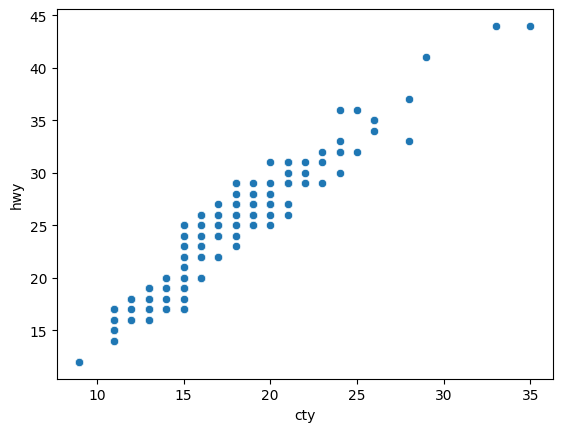

In [11]:
# Scatter Plot
sns.scatterplot(x="cty", y="hwy", data=mpg)

<AxesSubplot: xlabel='fl', ylabel='drv'>

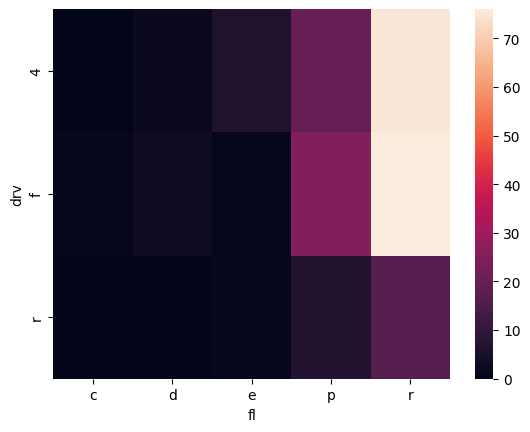

In [12]:
# heatmap
cty_by_drv_fl = mpg.pivot_table(values='cty', index="drv", columns="fl", aggfunc='count', fill_value=0)
sns.heatmap(data=cty_by_drv_fl)